## Solutions

### Exercise 1

Let $ T, K, M, v $ and $ y $ be as stated in the exercise

Using the envelope theorem, one can show that $ (Tv)'(y) = u'(\sigma(y)) $
where $ \sigma(y) $ solves


<a id='equation-cpi-foo'></a>
$$
u'(\sigma(y))
= \beta \int v' (f(y - \sigma(y)) z ) f'(y - \sigma(y)) z \phi(dz) \tag{10}
$$

Hence $ MTv(y) = (u')^{-1} (u'(\sigma(y))) = \sigma(y) $

On the other hand, $ KMv(y) $ is the $ \sigma(y) $ that solves

$$
\begin{aligned}
    u'(\sigma(y))
    & = \beta \int (u' \circ (Mv)) (f(y - \sigma(y)) z ) f'(y - \sigma(y)) z \phi(dz)
    \\
    & = \beta \int (u' \circ ((u')^{-1} \circ v'))
        (f(y - \sigma(y)) z ) f'(y - \sigma(y)) z \phi(dz)
    \\
    & = \beta \int v'(f(y - \sigma(y)) z ) f'(y - \sigma(y)) z \phi(dz)
\end{aligned}
$$

We see that $ \sigma(y) $ is the same in each case

### Exercise 2

We need to show that $ M $ is a bijection from $ \mathscr V $ to $ \mathscr P $

To see this, first observe that, in view of our assumptions above, $ u' $ is a strictly decreasing continuous bijection from $ (0,\infty) $ to itself

It [follows](https://math.stackexchange.com/questions/672174/continuity-of-an-inverse-function) that $ h $ has the same properties

Moreover, for fixed $ v \in \mathscr V $, the derivative $ v' $ is
a continuous, strictly decreasing function

Hence, for fixed $ v \in \mathscr V $, the map $ M v = h \circ v' $
is strictly increasing and continuous, taking values in $ (0, \infty) $

Moreover, interiority holds because $ v' $ strictly dominates $ u' $, implying that

$$
(M v)(y) = h(v'(y)) < h(u'(y)) = y
$$

In particular, $ \sigma(y) := (Mv)(y) $ is an element of $ \mathscr
P $

To see that each $ \sigma \in \mathscr P $ has a preimage $ v \in \mathscr V $ with $ Mv = \sigma $, fix any $ \sigma \in \mathscr P $

Let $ v(y) := \int_0^y u'(\sigma(x)) dx $ with $ v(0) = 0 $

With a small amount of effort you will be able to show that $ v \in \mathscr V $ and $ Mv = \sigma $

It’s also true that $ M $ is one-to-one on $ \mathscr V $

To see this, suppose that  $ v $ and $ w $ are elements of $ \mathscr V $
satisfying $ Mv = Mw $

Then $ v(0) = w(0) = 0 $ and $ v' = w' $ on $ (0, \infty) $

The fundamental theorem of calculus then implies that $ v = w $ on $ \mathbb R_+ $

### Exercise 3

Here’s the code, which will execute if you’ve run all the code above

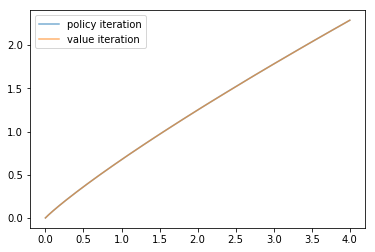

In [9]:
γ = 1.5   # Preference parameter

@njit
def u(c):
    return (c**(1 - γ) - 1) / (1 - γ)

@njit
def u_prime(c):
    return c**(-γ)

og = OptimalGrowthModel(f=f, f_prime=f_prime, u=u, u_prime=u_prime)

T, get_greedy = operator_factory(og)
K = time_operator_factory(og)

σ = y_grid        # Initial condition for σ
v = u(y_grid)     # Initial condition for v
sim_length = 20

for i in range(sim_length):
    σ = K(σ)  # Time iteration
    v = T(v)  # Value function iteration


plt.plot(y_grid, σ, alpha=0.6, label="policy iteration")
plt.plot(y_grid, get_greedy(v), alpha=0.6, label="value iteration")
plt.legend()
plt.show()

The policies are indeed close

### Exercise 4

Here’s is the function we need to solve the model using value function iteration,
copied from the previous lecture

In [10]:
def solve_model(og,
                use_parallel=True,
                tol=1e-4, 
                max_iter=1000, 
                verbose=True,
                print_skip=25): 

    T, _ = operator_factory(og, parallel_flag=use_parallel)

    # Set up loop
    v = np.log(og.y_grid)  # Initial condition
    i = 0
    error = tol + 1

    while i < max_iter and error > tol:
        v_new = T(v)
        error = np.max(np.abs(v - v_new))
        i += 1
        if verbose and i % print_skip == 0:
            print(f"Error at iteration {i} is {error}.")
        v = v_new

    if i == max_iter: 
        print("Failed to converge!")

    if verbose and i < max_iter:
        print(f"\nConverged in {i} iterations.")
        
    return v_new

Similarly, we can write a function that uses `K` to solve the model

In [11]:
def solve_model_time(og,
                     use_parallel=True,
                     tol=1e-4,
                     max_iter=1000,
                     verbose=True,
                     print_skip=25):

    K = time_operator_factory(og, parallel_flag=use_parallel)

    # Set up loop
    σ = og.y_grid  # Initial condition
    i = 0
    error = tol + 1

    while i < max_iter and error > tol:
        σ_new = K(σ)
        error = np.max(np.abs(σ - σ_new))
        i += 1
        if verbose and i % print_skip == 0:
            print(f"Error at iteration {i} is {error}.")
        σ = σ_new

    if i == max_iter:
        print("Failed to converge!")

    if verbose and i < max_iter:
        print(f"\nConverged in {i} iterations.")

    return σ_new

Solving both models and plotting

Error at iteration 25 is 0.4168213708442181.
Error at iteration 50 is 0.1502210535289379.


Error at iteration 75 is 0.05413917449482142.
Error at iteration 100 is 0.019511580741372825.


Error at iteration 125 is 0.0070319096401156855.
Error at iteration 150 is 0.002534277147510977.


Error at iteration 175 is 0.0009133451636529344.
Error at iteration 200 is 0.00032916659849391294.


Error at iteration 225 is 0.00011863056137784156.

Converged in 230 iterations.



Converged in 10 iterations.


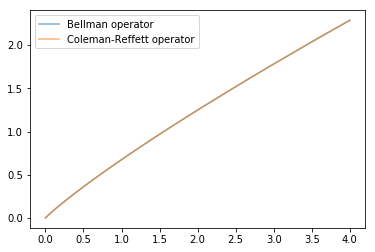

In [12]:
v_star = solve_model(og)
σ_star = solve_model_time(og)

plt.plot(y_grid, get_greedy(v_star), alpha=0.6, label='Bellman operator')
plt.plot(y_grid, σ_star, alpha=0.6, label='Coleman-Reffett operator')
plt.legend()
plt.show()

Time iteration is numerically far more accurate for a given number of iterations